In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt

In [2]:
data = pd.read_csv('final_table.csv')

In [60]:
df = data.copy()
df.columns

Index(['Unnamed: 0', 'Age', 'Primary_streaming_service', 'Hours_per_day',
       'While_working', 'Instrumentalist', 'Composer', 'Fav_genre',
       'Exploratory', 'Foreign_languages', 'BPM_range', 'Frequency_Classical',
       'Frequency_Country', 'Frequency_EDM', 'Frequency_Folk',
       'Frequency_Gospel', 'Frequency_Hip_hop', 'Frequency_Jazz',
       'Frequency_K_pop', 'Frequency_Latin', 'Frequency_Lofi',
       'Frequency_Metal', 'Frequency_Pop', 'Frequency_R_B', 'Frequency_Rap',
       'Frequency_Rock', 'Frequency_Video_game_music', 'Anxiety', 'Depression',
       'Insomnia', 'OCD', 'Music_effects', 'Date', 'Time', 'Year', 'Month',
       'Day'],
      dtype='object')

In [42]:
streaming_service_user_counts = df['Primary_streaming_service'].value_counts()

fig = px.pie(values= streaming_service_user_counts.values, names= streaming_service_user_counts.index,
             title='Primary Streaming service Distribution of Total Listeners')

fig.show()

The graphic illustrates the distribution of total listeners across different primary streaming services. It reveals that Spotify holds the majority share with 62.2%, followed by YouTube at 12.8%, and Apple at 6.93%. While Pandora accounts for a smaller percentage at 1.49%, it still represents a portion of the user base. Additionally, there's a noteworthy percentage (9.65%) of users who do not use any streaming service.

Breakdown is important for our analysis because it helps understand the user preferences, which can influence music listening habits.

In [8]:
avg_hours_per_genre = df.groupby('Fav_genre')['Hours_per_day'].sum().reset_index()

fig = px.bar(avg_hours_per_genre, x='Fav_genre', y='Hours_per_day',
             title='Average Listening Hours per Day by Favorite Genre')
fig.show()

In [26]:
daily_genre_hours = df.groupby(['Date', 'Fav_genre'])['Hours_per_day'].sum().reset_index()

fig = px.histogram(daily_genre_hours, x='Fav_genre', y='Hours_per_day', color='Fav_genre', title='Daily Listening Hours by Genre')
fig.update_layout(xaxis_title='Favorite Genre', yaxis_title='Listening Hours', legend_title='Favorite Genre')
fig.show()

In [161]:
avg_listening_hours_per_language = df.groupby('Foreign_languages')['Hours_per_day'].mean().reset_index()

fig = px.bar(avg_listening_hours_per_language, x='Foreign_languages', y='Hours_per_day',
             title='Average Listening Hours per Day by Foreign Language',
             color='Foreign_languages')

fig.show()

In [62]:
genre_counts_over_time = df.groupby(['Date', 'Fav_genre']).size().unstack(fill_value=0)

fig = px.line(genre_counts_over_time, x=genre_counts_over_time.index, y=genre_counts_over_time.columns,
              title='Changes in Preferred Genres Over Time', labels={'Date': 'Date', 'value': 'Frequency', 'variable': 'Favorite Genre'})
fig.update_layout(xaxis_title='Date', yaxis_title='Frequency')
fig.show()

In [79]:
genre_counts_over_time = df.groupby(['Time', 'Fav_genre']).size().unstack(fill_value=0)

fig = px.line(genre_counts_over_time, x=genre_counts_over_time.index, y=genre_counts_over_time.columns,
              title='Changes in Preferred Genres during Day', labels={'Time': 'Time', 'value': 'Frequency', 'variable': 'Favorite Genre'})
fig.update_layout(xaxis_title='Date', yaxis_title='Frequency')
fig.show()

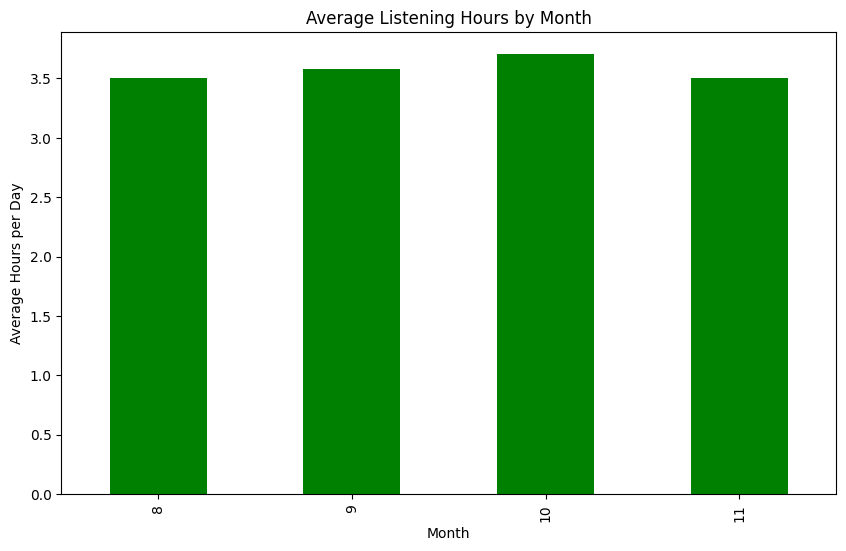

In [167]:
seasonal= df.groupby('Month')['Hours_per_day'].mean()

plt.figure(figsize=(10, 6))
seasonal.plot(kind='bar', color='green')
plt.title('Average Listening Hours by Month')
plt.xlabel('Month')
plt.ylabel('Average Hours per Day')
plt.show()

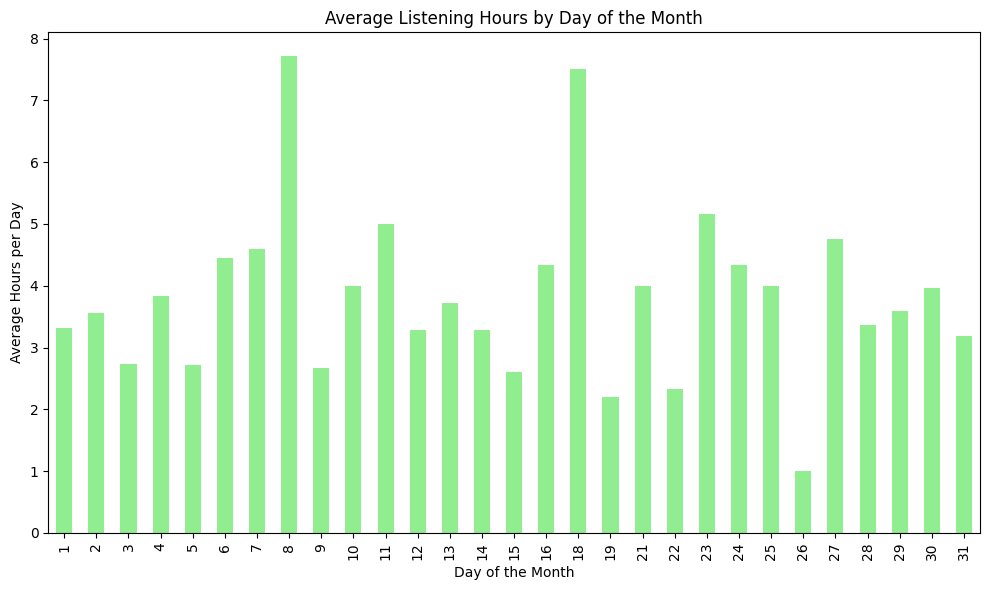

In [168]:
daily_data = df.groupby('Day')['Hours_per_day'].mean()

plt.figure(figsize=(10, 6))
daily_data.plot(kind='bar', color='lightgreen')
plt.title('Average Listening Hours by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Average Hours per Day')
plt.tight_layout()
plt.show()

In [150]:
service_Month = df.groupby(['Primary_streaming_service', 'Day']).size().reset_index(name='Count')

fig = px.bar(service_Month, x='Primary_streaming_service', y=['Day'],
             title='Comparison of Mental Health Indicators Between Favorite Genres')
fig.update_layout(xaxis_title='Primary_streaming_service', yaxis_title='Month', barmode='group')
fig.show()

In [89]:
fig = px.scatter(df, x='Age', y='Hours_per_day', title='Correlation between Age and Hours of Listening')
fig.show()

In [92]:
Age_hours = df[['Age', 'Hours_per_day']]

correlation_matrix = Age_hours.corr()

print(correlation_matrix)

                    Age  Hours_per_day
Age            1.000000      -0.045828
Hours_per_day -0.045828       1.000000


In [94]:
correlation_matrix = df[['Hours_per_day', 'Anxiety', 'Depression', 'Insomnia', 'OCD']].corr()
print(correlation_matrix)

               Hours_per_day   Anxiety  Depression  Insomnia       OCD
Hours_per_day       1.000000  0.048929    0.111352  0.143050  0.119609
Anxiety             0.048929  1.000000    0.519470  0.292346  0.347932
Depression          0.111352  0.519470    1.000000  0.378953  0.196397
Insomnia            0.143050  0.292346    0.378953  1.000000  0.226085
OCD                 0.119609  0.347932    0.196397  0.226085  1.000000


In [154]:
hours_groups = df.groupby('Hours_per_day')[['Anxiety', 'Insomnia', 'OCD', 'Depression']].mean().reset_index()

fig = px.bar(hours_groups, x='Hours_per_day', y=['Anxiety', 'Insomnia', 'OCD', 'Depression'],
             title='Comparison of Mental Health Indicators Between Hours of listening per day')
fig.update_layout(xaxis_title='Hours_per_day', yaxis_title='Mean Health Indicator Value', barmode='group')
fig.show()

In [129]:
genre_groups = df.groupby('Fav_genre')[['Anxiety', 'Insomnia', 'OCD', 'Depression']].mean().reset_index()

fig = px.bar(genre_groups, x='Fav_genre', y=['Anxiety', 'Insomnia', 'OCD', 'Depression'],
             title='Comparison of Mental Health Indicators Across Favorite Genres')
fig.update_layout(xaxis_title='Favorite Genre', yaxis_title='Mean Health Indicator Value', barmode='group')
fig.show()

In [132]:
df.head()

,Unnamed: 0,Age,Primary_streaming_service,Hours_per_day,While_working,Instrumentalist,Composer,Fav_genre,Exploratory,Foreign_languages,...,Anxiety,Depression,Insomnia,OCD,Music_effects,Date,Time,Year,Month,Day
0,0,25,Apple Music,2,False,False,False,EDM,False,True,...,10,3,1,4,Improve,2022-08-28,23:26:58,2022,8,28
1,1,16,Other streaming service,4,True,False,False,EDM,True,True,...,4,7,1,3,Improve,2022-09-13,01:55:43,2022,9,13
2,2,22,Spotify,10,False,True,True,EDM,False,True,...,4,7,7,3,Improve,2022-08-28,17:15:18,2022,8,28
3,3,26,Spotify,6,True,False,False,EDM,False,True,...,10,10,8,2,No effect,2022-08-30,05:16:13,2022,8,30
4,4,18,I do not use a streaming service.,4,True,True,False,EDM,False,True,...,8,7,10,6,Improve,2022-09-02,09:25:05,2022,9,2


In [134]:
Service_groups = df.groupby('Primary_streaming_service')[['Anxiety', 'Insomnia', 'OCD', 'Depression']].mean().reset_index()

fig = px.bar(Service_groups, x='Primary_streaming_service', y=['Anxiety', 'Insomnia', 'OCD', 'Depression'],
             title='Comparison of Mental Health Indicators Between Primary Streaming Services')
fig.update_layout(xaxis_title='Primary Streaming Service', yaxis_title='Mean Health Indicator Value', barmode='group')
fig.show()

In [137]:
Age_groups = df.groupby('Age')[['Anxiety', 'Insomnia', 'OCD', 'Depression']].mean().reset_index()

fig = px.bar(Age_groups, x='Age', y=['Anxiety', 'Insomnia', 'OCD', 'Depression'],
             title='Comparison of Mental Health Indicators Between Ages')
fig.update_layout(xaxis_title='Age', yaxis_title='Mean Health Indicator Value', barmode='group')
fig.show()